<a href="https://colab.research.google.com/github/Ingrithtorres28/DSRP-research/blob/main/%22Written_report%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Does parents’ work affect whether students receive scholarships or not?


By: Ingrith Elizabet Hernandez Castro. *(Ingrith Hernandez)*

Many factors influence whether a student receives a scholarship.

**My question was:** *Does parents' work affect whether students receive scholarships or not?* What I did was test whether income would cause their children to receive more need-based scholarships.

**Approach:**
I used data from 4,424 students with variables on parental employment and scholarships. I analyzed the 10 most common occupations for mothers and fathers and compared the proportions of scholarship recipients. I performed chi-square tests to determine the statistical relationship.

The results showed a very strong relationship between parental employment and scholarships (p < 0.05). Those who received the most scholarships were children of unemployed parents or those in unskilled jobs, such as drivers or cleaners.

Receiving a scholarship is often important for access to university education. Various factors, such as student performance and family finances, influence this process. Parental employment often reflects a student's socioeconomic status, but these factors are not always directly analyzed.

My research explores whether parents' employment affects the likelihood of their children receiving scholarships. The hypothesis is that low-income jobs or unemployment increase this likelihood.



## **Below I will show the codes and results:**

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [7]:
url = '/content/data.csv'
Wildline = pd.read_csv(url, sep=';')

In [8]:
colums_needed= ['Father\'s occupation', 'Mother\'s occupation', 'Scholarship holder']

Wildline_selected= Wildline[colums_needed]

In [9]:
print("Father\'s occupations:", Wildline_selected["Father\'s occupation"].unique())

print("Mother\'s occupations:", Wildline_selected["Mother\'s occupation"].unique())

print("Scholarship", Wildline_selected["Scholarship holder"].unique())

Father's occupations: [  9   3   7  10   5   8   4   1   2 124   6   0  90 175 121  99 144 195
 192 161 193 151 182 132 131 194 163 135 143 171 103 172 152 183 122 102
 181 134 123 112 153 174 141 114 101 154]
Mother's occupations: [  5   3   9   7   4   1 125   0   6   2  90   8 141 175  99 191 151 194
 192 132 152 134  10 143 123 173 193 122 144 131 171 153]
Scholarship [0 1]


In [10]:
father_table = pd.crosstab(Wildline_selected["Father\'s occupation"], Wildline_selected["Scholarship holder"])

mother_table = pd.crosstab(Wildline_selected["Mother\'s occupation"], Wildline_selected["Scholarship holder"])

In [11]:
job_mapping={1:"Farmer", 2:"Teacher", 3:"Drive", 4:"Laborer",5:"Merchant", 6:"Unemployed",7:"Construction", 8:"Unskilled Workers", 9:"Other Situation",10:"transport"}

In [12]:
father_counts = father_table.sum(axis=1)

In [13]:
top_father_jobs = father_counts.sort_values(ascending=False).head(9)

In [14]:
top_father_jobs_named = top_father_jobs.rename(index=job_mapping)

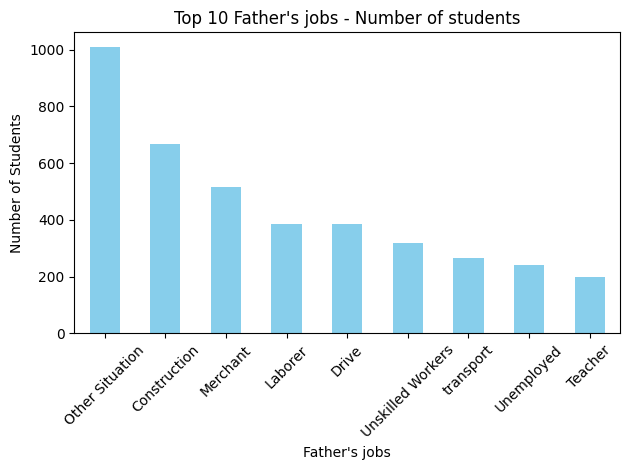

In [25]:
#Bar chart showing the most common jobs held by fathers in the sample. Day laborers, drivers, and unskilled laborers are prominent.

top_father_jobs_named.plot(kind='bar', color='skyblue')

plt.title("Top 10 Father's jobs - Number of students")

plt.xlabel("Father's jobs")

plt.ylabel("Number of Students")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

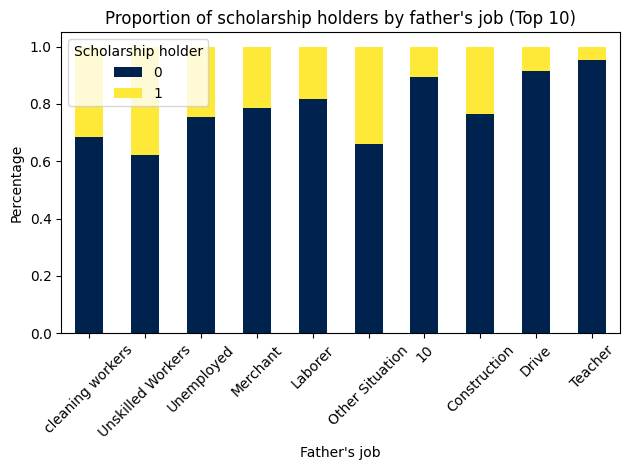

In [29]:
# Stacked bar chart showing the proportion of scholarship recipients by father's occupation. Low-income jobs show higher proportions of scholarship recipients.
top10_fathers = Wildline['Father\'s occupation'].value_counts().head(10).index

filtered_df = Wildline[Wildline['Father\'s occupation'].isin(top10_fathers)]

father_table = pd.crosstab(filtered_df['Father\'s occupation'], filtered_df['Scholarship holder'])

father_table = father_table.loc[father_table.sum(axis=1).sort_values(ascending=False).index]

father_table = father_table.rename(index=job_mapping)

father_percentage = father_table.div(father_table.sum(axis=1), axis=0)

father_percentage.plot(kind='bar', stacked=True, colormap='cividis')

plt.title("Proportion of scholarship holders by father's job (Top 10)")

plt.xlabel("Father's job")

plt.ylabel("Percentage")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [17]:
job_mapping={0:"Farmer", 1:"Teacher", 2:"Drive", 3:"Laborer",4:"Merchant", 5:"Unemployed",6:"Construction", 7:"Unskilled Workers", 8:"Other Situation",9:"cleaning workers"}

In [18]:
mother_counts = mother_table.sum(axis=1)

In [19]:
top_mother_jobs = mother_counts.sort_values(ascending=False).head(9)

In [20]:
top_mother_jobs_named = top_mother_jobs.rename(index=job_mapping)

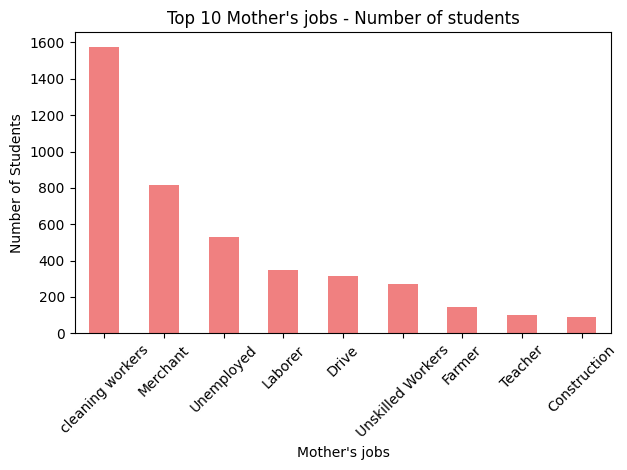

In [26]:
#Bar chart showing mothers' most common jobs, such as farmworker, cleaner, and laborer.

top_mother_jobs_named.plot(kind='bar', color='lightcoral')

plt.title("Top 10 Mother's jobs - Number of students")

plt.xlabel("Mother's jobs")

plt.ylabel("Number of Students")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

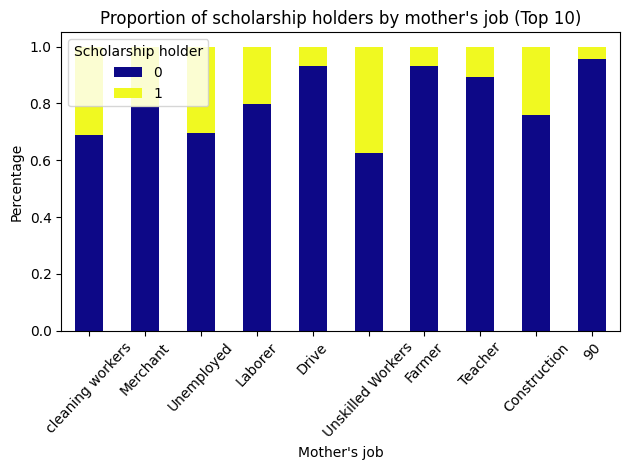

In [28]:
# Analogous to the previous graph but for mothers, confirming similar patterns.

top10_mothers = Wildline['Mother\'s occupation'].value_counts().head(10).index

filtered_df = Wildline[Wildline['Mother\'s occupation'].isin(top10_mothers)]

mother_table = pd.crosstab(filtered_df['Mother\'s occupation'], filtered_df['Scholarship holder'])

mother_table = mother_table.loc[mother_table.sum(axis=1).sort_values(ascending=False).index]

mother_table = mother_table.rename(index=job_mapping)

mother_percentage = mother_table.div(mother_table.sum(axis=1), axis=0)

mother_percentage.plot(kind='bar', stacked=True, colormap='plasma')

plt.title("Proportion of scholarship holders by mother's job (Top 10)")

plt.xlabel("Mother's job")

plt.ylabel("Percentage")

plt.xticks(rotation=47)

plt.tight_layout()

plt.show()

 When importing the first graphs, we were given a comparison of the parents' jobs, as it gave us the top 10 most common jobs for those who receive scholarships and one or two that receive less, helping us to see a very common pattern, which confirmed that work has a significant influence.

Chi-square tests showed extremely low P-values for both occupations, indicating a statistically significant relationship between parental employment type and scholarships.

In [23]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

le = LabelEncoder()

Wildline['mother_encoded'] = le.fit_transform(Wildline["Mother's occupation"])
Wildline['scholar_encoded'] = le.fit_transform(Wildline["Scholarship holder"])

chi_table = pd.crosstab(Wildline['mother_encoded'], Wildline['scholar_encoded'])

chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

print("1. Chi-Squared Test with Categorical Data:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-Value: {p_val}")

1. Chi-Squared Test with Categorical Data:
Chi2 Stat: 198.99964021175867
P-Value: 1.9903132494321284e-26


In [24]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

le = LabelEncoder()

Wildline['father_encoded'] = le.fit_transform(Wildline["Father's occupation"])
Wildline['scholar_encoded'] = le.fit_transform(Wildline["Scholarship holder"])

chi_table = pd.crosstab(Wildline['father_encoded'], Wildline['scholar_encoded'])

chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

print("1. Chi-Squared Test with Categorical Data:")
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-Value: {p_val}")

1. Chi-Squared Test with Categorical Data:
Chi2 Stat: 268.8162320828575
P-Value: 1.2199457748588534e-33


# Discussion:

**Results of the initial hypothesis:**
Parents' employment and economic situation influence the likelihood of students receiving scholarships. This highlights the importance of considering socioeconomic factors to design more efficient financial aid policies.

Limitations include the lack of additional variables such as exact income and parents' education. Furthermore, other factors such as grades or extracurricular activities were not analyzed.

As a next step, I would ideally incorporate broader data and conduct multivariate analyses to better understand the relative influence of each factor.

**The steps I would follow are:**
1. Expand the analysis to consider actual family income and not just occupations.

2. Evaluate whether the relationship holds when controlling for other variables such as academic performance or country of origin.

3. Analyze whether there is a preference in the allocation of scholarships based on school type or region.

# Code and Data Availability:
The analysis was performed using Python in Google Colab. To the best of my knowledge, pandas, matplotlib, seaborn, and statsmodels libraries were used. Much of the code data I extracted was from notebooks 1 through 10, which I reviewed and selected the ones that were most helpful for my project.

Columns related to parents' occupation and scholarships were analyzed, and stacked bar charts and chi-square tests were applied to validate hypotheses.

# ***Acknowledgment:***

***I want to sincerely thank The Coding School for giving me the opportunity to be part of this program as an ILD student. Being in the program has been a unique experience where I not only learned technical skills, problem-solving, and English communication.
I especially want to thank the incredible team behind this program, because their guidance and support made a huge difference in my learning process.
First, I want to give a special thanks to Jaden, one of the TAs, for being the person I was able to talk to the most. Jaden always listened to my questions patiently, explained things clearly, and encouraged me to keep going when I felt stuck.
I am also very grateful to my mentor, Pei, for all her valuable recommendations, advice, and constant support throughout my project. She helped me see my work from different perspectives and improve the quality of my research.
And finally, I want to thank Kayvan, my first TA, who kindly guided me during my first weeks in the program. He helped me adapt to the new environment and understand the tools we were using, which gave me the confidence to continue learning.
Without the help of each of them, my experience here would not have been the same, and I am so grateful for all the knowledge, kindness, and motivation they shared with me. It was a great experience. Thank you for everything.***